In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import gc
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/train_df.csv')
test_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/test_df.csv')

Mounted at /content/drive


<ipython-input-3-accc53ad18a1>:3: DtypeWarning: Columns (300,385) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/train_df.csv')
<ipython-input-3-accc53ad18a1>:4: DtypeWarning: Columns (299) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df=pd.read_csv('/content/drive/MyDrive/신용카드고객/test_df.csv')


In [ ]:
train_df
train_df1=train_df.copy()

In [ ]:
train_df

,Unnamed: 0,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,...,변동률_RV일시불평잔,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M
0,0,201807,TRAIN_000000,2,40대,D,1,1,0,1,...,0.999998,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543
1,1,201807,TRAIN_000001,1,30대,E,1,1,1,1,...,1.092698,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000
2,2,201807,TRAIN_000002,1,30대,C,1,1,0,1,...,1.006124,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420
3,3,201807,TRAIN_000003,2,40대,D,1,1,0,1,...,0.999998,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124
4,4,201807,TRAIN_000004,2,40대,E,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,2399995,201812,TRAIN_399995,2,70대이상,E,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN
2399996,2399996,201812,TRAIN_399996,2,50대,D,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815
2399997,2399997,201812,TRAIN_399997,1,30대,C,1,1,0,1,...,0.999998,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000
2399998,2399998,201812,TRAIN_399998,1,40대,E,1,1,1,1,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN


In [ ]:
import pandas as pd
total_rows = 2400000

# 1. 결측치 개수 계산
missing_counts = train_df.isnull().sum()

# 2. 결측치 비율 계산 (%)
missing_ratios = (missing_counts / total_rows) * 100

# 3. 결측치가 있는 변수만 필터링
missing_train_df = pd.DataFrame({
    '결측치 개수': missing_counts,
    '결측 비율 (%)': missing_ratios
})
missing_train_df = missing_train_df[missing_train_df['결측치 개수'] > 0]  # 결측치가 0인 변수 제외

# 4. 결과 정렬 (결측 비율 높은 순)
missing_train_df = missing_train_df.sort_values(by='결측 비율 (%)', ascending=False)

# 5. 출력
print(f"총 데이터 수: {total_rows}")
print("\n결측치가 있는 변수 목록:")
print(missing_train_df)


총 데이터 수: 2400000

결측치가 있는 변수 목록:
                 결측치 개수  결측 비율 (%)
연체일자_B0M        2394336  99.764000
_3순위여유업종        2377725  99.071875
_3순위납부업종        2310187  96.257792
_2순위여유업종        2302286  95.928583
_3순위교통업종        2045455  85.227292
_2순위납부업종        2033640  84.735000
최종카드론_대출일자      1988330  82.847083
_1순위여유업종        1987260  82.802500
최종카드론_신청경로코드    1958226  81.592750
최종카드론_금융상환방식코드  1958126  81.588583
RV신청일자          1951236  81.301500
_2순위교통업종        1656423  69.017625
OS구분코드          1633566  68.065250
_3순위쇼핑업종        1312267  54.677792
_1순위납부업종        1216263  50.677625
_1순위교통업종        1164494  48.520583
_2순위쇼핑업종        1135042  47.293417
_3순위업종          1107898  46.162417
_2순위신용체크구분       958115  39.921458
_1순위쇼핑업종         922663  38.444292
_2순위업종           912725  38.030208
혜택수혜율_B0M        555522  23.146750
_1순위업종           539992  22.499667
최종유효년월_신용_이용     534231  22.259625
혜택수혜율_R3M        488746  20.364417
가입통신회사코드         387570  16.148750
직장시도명            24496

In [ ]:
# 결측치를 '없음'으로 채우기
industry_list = [
    '_3순위여유업종',
    '_3순위납부업종',
    '_2순위여유업종',
    '_3순위교통업종',
    '_2순위납부업종',
    '_1순위여유업종',
    '_2순위교통업종',
    '_3순위쇼핑업종',
    '_1순위납부업종',
    '_1순위교통업종',
    '_2순위쇼핑업종',
    '_3순위업종',
    '_1순위쇼핑업종',
    '_2순위업종',
    '_1순위업종'
]

# 각 업종 목록의 결측치를 '없음'으로 채우기
for industry in industry_list:
    train_df1[industry].fillna('없음', inplace=True)



<ipython-input-6-e982d7185d84>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df1[industry].fillna('없음', inplace=True)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

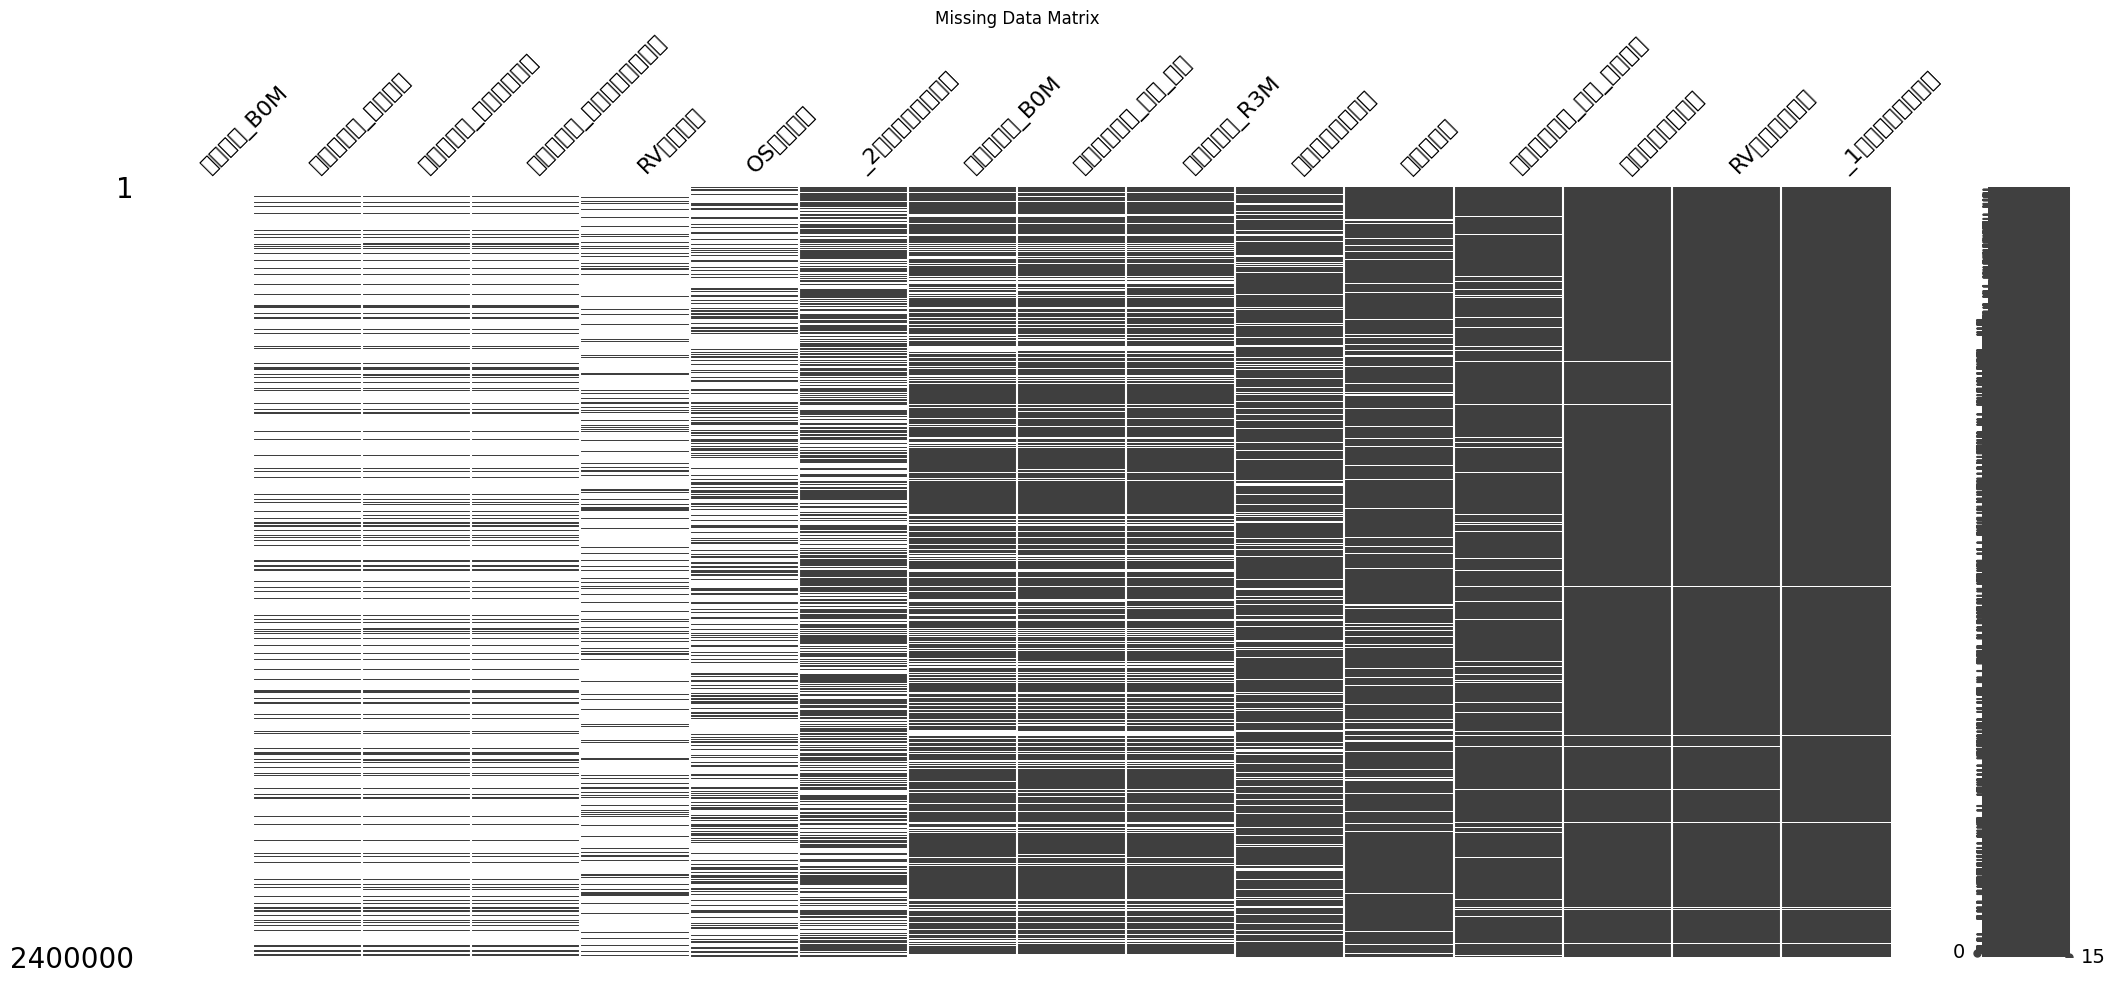

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/

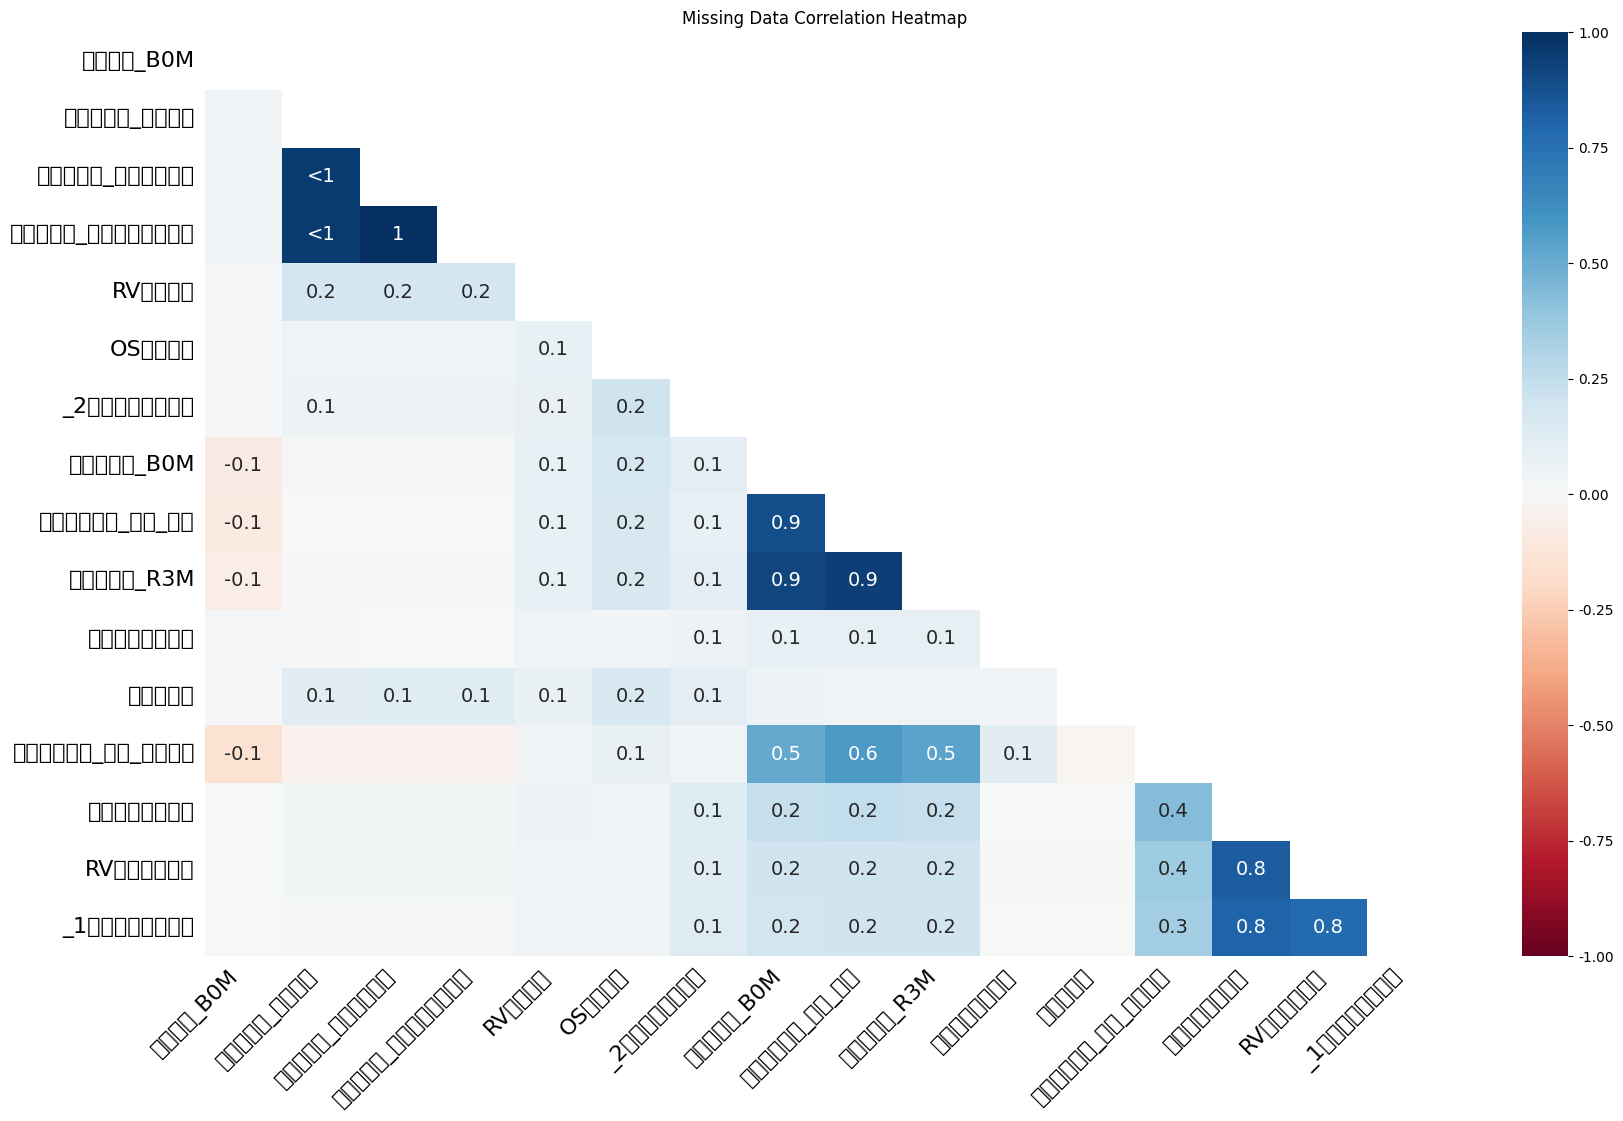

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

# 데이터 로드 (주어진 데이터는 일부이므로 전체 데이터가 있다고 가정)
data = train_df1  # 실제 파일 경로로 수정 필요

# 'ID'와 'Segment' 열 제거
data = data.drop(columns=['ID'])

# 결측치 비율이 제공된 변수 리스트
missing_vars = [
    '연체일자_B0M', '최종카드론_대출일자', '최종카드론_신청경로코드', '최종카드론_금융상환방식코드',
    'RV신청일자', 'OS구분코드', '_2순위신용체크구분', '혜택수혜율_B0M', '최종유효년월_신용_이용',
    '혜택수혜율_R3M', '가입통신회사코드', '직장시도명', '최종유효년월_신용_이용가능',
    '최종카드발급일자', 'RV전환가능여부', '_1순위신용체크구분'
]

# 결측치 비율 딕셔너리
missing_rates = {
    '연체일자_B0M': 99.764000, '최종카드론_대출일자': 82.847083, '최종카드론_신청경로코드': 81.592750,
    '최종카드론_금융상환방식코드': 81.588583, 'RV신청일자': 81.301500, 'OS구분코드': 68.065250,
    '_2순위신용체크구분': 39.921458, '혜택수혜율_B0M': 23.146750, '최종유효년월_신용_이용': 22.259625,
    '혜택수혜율_R3M': 20.364417, '가입통신회사코드': 16.148750, '직장시도명': 10.207042,
    '최종유효년월_신용_이용가능': 8.768625, '최종카드발급일자': 1.748542, 'RV전환가능여부': 1.228042,
    '_1순위신용체크구분': 1.164583
}

# 1. 결측치 시각화
msno.matrix(data[missing_vars])
plt.title("Missing Data Matrix")
plt.show()

# 2. 결측치 패턴 분석 (상관관계 확인)
msno.heatmap(data[missing_vars])
plt.title("Missing Data Correlation Heatmap")
plt.show()




In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns


# 결측치 비율이 제공된 변수 리스트
missing_vars = [
    '연체일자_B0M', '최종카드론_대출일자', '최종카드론_신청경로코드', '최종카드론_금융상환방식코드',
    'RV신청일자', 'OS구분코드', '_2순위신용체크구분', '혜택수혜율_B0M', '최종유효년월_신용_이용',
    '혜택수혜율_R3M', '가입통신회사코드', '직장시도명', '최종유효년월_신용_이용가능',
    '최종카드발급일자', 'RV전환가능여부', '_1순위신용체크구분'
]

# 결측치 비율 딕셔너리
missing_rates = {
    '연체일자_B0M': 99.764000, '최종카드론_대출일자': 82.847083, '최종카드론_신청경로코드': 81.592750,
    '최종카드론_금융상환방식코드': 81.588583, 'RV신청일자': 81.301500, 'OS구분코드': 68.065250,
    '_2순위신용체크구분': 39.921458, '혜택수혜율_B0M': 23.146750, '최종유효년월_신용_이용': 22.259625,
    '혜택수혜율_R3M': 20.364417, '가입통신회사코드': 16.148750, '직장시도명': 10.207042,
    '최종유효년월_신용_이용가능': 8.768625, '최종카드발급일자': 1.748542, 'RV전환가능여부': 1.228042,
    '_1순위신용체크구분': 1.164583
}

# 1. 결측치 간 상관관계 직접 계산
# 결측 여부를 나타내는 더미 변수 생성 (0: 결측 아님, 1: 결측)
missing_dummy_df = pd.DataFrame()
for var in missing_vars:
    if var in data.columns:
        missing_dummy_df[f'{var}_missing'] = data[var].isna().astype(int)

# 더미 변수들 간의 상관계수 계산
corr_matrix = missing_dummy_df.corr()

# 상관계수를 딕셔너리로 변환
correlation_pairs = {}
for i, var1 in enumerate(corr_matrix.index):
    for j, var2 in enumerate(corr_matrix.columns):
        if i < j:  # 중복 제거 (대칭 행렬이므로)
            corr_value = corr_matrix.iloc[i, j]
            if not np.isnan(corr_value):  # NaN 값 제외
                # 변수 이름에서 '_missing' 접미사 제거
                var1_clean = var1.replace('_missing', '')
                var2_clean = var2.replace('_missing', '')
                correlation_pairs[(var1_clean, var2_clean)] = corr_value

# 2. MCAR 테스트 (범주형 변수에 대해 카이제곱 검정)
def check_mcar_categorical(data, var, group_var):
    if var in data.columns and group_var in data.columns:
        data[f'{var}_missing'] = data[var].isna().astype(int)
        contingency_table = pd.crosstab(data[group_var], data[f'{var}_missing'])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        return p
    return None

# 3. 상관관계 기반으로 MNAR 판단 보조 함수
def get_max_correlation(var):
    max_corr = 0
    for (var1, var2), corr in correlation_pairs.items():
        if var1 == var or var2 == var:
            max_corr = max(max_corr, abs(corr))  # 절대값 사용
    return max_corr

# 4. 결측치 메커니즘 분석
def analyze_missing_mechanism(data, var, missing_rate):
    print(f"\n{var}: 결측률 {missing_rate}%")

    # 히트맵에서 확인된 최대 상관계수
    max_corr = get_max_correlation(var)
    print(f" - 히트맵에서 확인된 최대 상관계수: {max_corr:.2f}")

    # 결측률과 상관계수를 기준으로 판단
    if missing_rate > 80:
        print(" - 결측률이 매우 높음 (>80%). MNAR 가능성 있음 (데이터 생성 과정에서 발생하는 구조적 결측)")
    elif missing_rate > 30:
        if max_corr > 0.7:
            print(" - 결측률이 높고 상관계수가 높음 (30~80%, 상관계수 > 0.7). MNAR 가능성")
        else:
            print(" - 결측률이 높음 (30~80%). MAR 가능성 (다른 변수와 약한 연관성)")
    else:
        if max_corr > 0.7:
            print(" - 결측률이 낮으나 상관계수가 높음 (<30%, 상관계수 > 0.7). MNAR 가능성")
        else:
            print(" - 결측률이 낮음 (<30%). MCAR 또는 MAR 가능성")

    # 숫자형 변수와의 상관관계
    if var in data.columns:
        missing_dummy = data[var].isna().astype(int)
        numeric_cols = data.select_dtypes(include=[np.number]).columns
        corr_with_numeric = data[numeric_cols].corrwith(missing_dummy).dropna().sort_values(ascending=False)
        print(f" - 숫자형 변수와 결측 여부의 상관관계:\n{corr_with_numeric}")

        # 범주형 변수와의 연관성
        categorical_cols = data.select_dtypes(exclude=[np.number]).columns
        print(f" - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):")
        for cat_var in categorical_cols:
            if cat_var in data.columns:
                p_value = check_mcar_categorical(data, var, cat_var)
                if p_value is not None:
                    print(f"   {cat_var}: {p_value:.4f}")

# 각 변수에 대해 결측치 메커니즘 분석
for variable, rate in missing_rates.items():
    analyze_missing_mechanism(data, variable, rate)

# 5. 결론 출력 및 Segment 분류를 위한 제안
print("\n=== 결론 ===")
for var, rate in missing_rates.items():
    if var in data.columns:
        # Segment를 기준으로 카이제곱 검정
        p_value_segment = check_mcar_categorical(data, var, 'Segment')

        # 다른 범주형 변수들과의 연관성도 확인 (참고용)
        categorical_cols = data.select_dtypes(exclude=[np.number]).columns
        p_values_other = {}
        for cat_var in categorical_cols:
            if cat_var != 'Segment':
                p_value = check_mcar_categorical(data, var, cat_var)
                if p_value is not None:
                    p_values_other[cat_var] = p_value

        max_corr = get_max_correlation(var)
        print(f"{var} (결측률: {rate}%):")
        if rate > 80 or max_corr > 0.7:
            print(" - MNAR로 판단 (결측률 > 80% 또는 상관계수 > 0.7)")
            print("   - Segment 분류 영향: Segment와의 연관성 확인 필요")
            if p_value_segment is not None:
                print(f"   - Segment와의 카이제곱 p-value: {p_value_segment:.4f}")
                if p_value_segment <= 0.05:
                    print("     - Segment와 유의미한 연관성 있음. 결측치가 Segment 분류에 영향을 줄 가능성 높음")
                else:
                    print("     - Segment와 유의미한 연관성 없음. 결측치가 Segment 분류에 큰 영향을 주지 않을 가능성")
        elif rate > 30 and p_value_segment is not None and p_value_segment <= 0.05:
            print(" - MAR로 판단 (결측률 30~80%, Segment와의 p-value <= 0.05)")
            print("   - Segment 분류 영향: Segment와 연관성 있음. 결측치가 Segment 분류에 영향을 줄 가능성")
        elif rate < 30 and (p_value_segment is None or p_value_segment > 0.05):
            print(" - MCAR로 판단 (결측률 < 30%, Segment와의 p-value > 0.05)")
            print("   - Segment 분류 영향: Segment와 연관성 낮음. 결측치가 Segment 분류에 큰 영향을 주지 않음")
        else:
            print(" - MAR로 판단 가능 (결측률과 Segment와의 p-value 기준)")
            print("   - Segment 분류 영향: Segment와 약한 연관성 가능")

        # 다른 범주형 변수와의 연관성 출력 (참고용)
        if p_values_other:
            print("   - 다른 범주형 변수와의 연관성 (참고):")
            for cat_var, p_val in p_values_other.items():
                print(f"     {cat_var}: p-value = {p_val:.4f}")



연체일자_B0M: 결측률 99.764%
 - 히트맵에서 확인된 최대 상관계수: 0.15
 - 결측률이 매우 높음 (>80%). MNAR 가능성 있음 (데이터 생성 과정에서 발생하는 구조적 결측)


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
연체일자_B0M_missing    1.000000
강제한도감액후경과월          0.200081
회원여부_이용가능_CA        0.123605
일시불ONLY전환가능여부       0.102411
증감율_이용금액_CA_분기      0.098706
                      ...   
연체잔액_할부_B0M        -0.678476
연체잔액_일시불_B0M       -0.684164
연체원금_B2M           -0.765099
연체원금_B1M           -0.838391
연체원금_최근            -0.843355
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0843
   연회비발생카드수_B0M: 0.0008
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.6163
   한도증액횟수_R12M: 0.0010
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 1.0000
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0.0000
   _2순위여유업종: 0.0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
최종카드론_대출일자_missing        1.000000
missing                   1.000000
최종카드론이용경과월                0.999853
최초카드론이용경과월                0.962517
최종카드론_금융상환방식코드_missing    0.957151
                            ...   
카드론이용월수_누적               -0.750974
최종카드론_대출금액               -0.849323
최종카드론_대출월수               -0.887451
최종카드론_대출이율               -0.947209
최종이용일자_카드론               -1.000000
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.5943
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0065
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.6538
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
최종카드론_신청경로코드_missing      1.000000
최종카드론_금융상환방식코드_missing    0.999381
최초카드론이용경과월                0.997648
최종카드론_대출일자_missing        0.956951
missing                   0.956951
                            ...   
카드론이용월수_누적               -0.767582
최종카드론_대출금액               -0.855484
최종카드론_대출월수               -0.904238
최종이용일자_카드론               -0.956950
최종카드론_대출이율               -0.993534
Length: 723, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0443
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0006
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.2146
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
최종카드론_금융상환방식코드_missing    1.000000
최종카드론_신청경로코드_missing      0.999381
최초카드론이용경과월                0.997760
최종카드론_대출일자_missing        0.957151
missing                   0.957151
                            ...   
카드론이용월수_누적               -0.767908
최종카드론_대출금액               -0.855445
최종카드론_대출월수               -0.904217
최종이용일자_카드론               -0.957151
최종카드론_대출이율               -0.993720
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0403
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0008
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.2150
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
RV신청일자_missing        1.000000
rv최초시작후경과일            0.998441
최종카드론이용경과월            0.188330
최종카드론_대출일자_missing    0.187278
missing               0.187278
                        ...   
RV_최대잔액_R12M         -0.348029
평잔_RV일시불_3M          -0.419327
평잔_RV일시불_6M          -0.425813
월중평잔_RV일시불           -0.441517
RV약정청구율              -0.946085
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0340
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0111
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
OS구분코드_missing        1.000000
방문후경과월_앱_R6M          0.388898
RP후경과월_통신             0.220576
_2순위신용체크구분_missing    0.206016
이용후경과월_할부_무이자         0.198617
                        ...   
이용건수_간편결제_B0M        -0.456669
이용건수_간편결제_R3M        -0.459909
이용건수_간편결제_R6M        -0.461290
이용개월수_페이_온라인_R6M     -0.475455
이용개월수_간편결제_R6M       -0.477332
Length: 723, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0011
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0000
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
_2순위신용체크구분_missing    1.000000
이용후경과월_체크             0.354568
증감율_이용건수_체크_전월        0.214266
OS구분코드_missing        0.206016
컨택건수_이용유도_인터넷_R6M     0.148291
                        ...   
유효카드수_신용             -0.519277
이용가능카드수_체크           -0.563027
유효카드수_체크             -0.564123
이용가능카드수_신용체크         -0.687141
유효카드수_신용체크           -0.735468
Length: 723, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 1.0000
   연회비발생카드수_B0M: 0.5127
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0438
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0009
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
혜택수혜율_B0M_missing       1.000000
혜택수혜율_R3M_missing       0.921293
최종유효년월_신용_이용_missing    0.889524
이용후경과월_신판               0.808610
이용후경과월_신용               0.793909
                          ...   
이용개월수_일시불_R6M          -0.934145
이용개월수_신판_R6M           -0.935833
이용개월수_신용_R3M           -0.962615
이용개월수_일시불_R3M          -0.963853
이용개월수_신판_R3M           -0.967212
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0000
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종:

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
최종유효년월_신용_이용_missing    1.000000
혜택수혜율_R3M_missing       0.939411
이용후경과월_신판               0.896751
혜택수혜율_B0M_missing       0.889524
이용후경과월_신용               0.883000
                          ...   
이용개월수_신용_R6M           -0.887305
이용개월수_신판_R6M           -0.889109
이용개월수_일시불_R3M          -0.903570
이용개월수_신용_R3M           -0.909567
이용개월수_신판_R3M           -0.911226
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0000
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종:

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
혜택수혜율_R3M_missing       1.000000
최종유효년월_신용_이용_missing    0.939411
혜택수혜율_B0M_missing       0.921293
이용후경과월_신판               0.850454
이용후경과월_신용               0.836204
                          ...   
이용개월수_신용_R6M           -0.925540
이용개월수_신판_R6M           -0.926991
이용개월수_일시불_R3M          -0.938941
이용개월수_신용_R3M           -0.946008
이용개월수_신판_R3M           -0.946986
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0000
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종:

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
가입통신회사코드_missing     1.000000
수신거부여부_SMS           0.386946
최종카드발급경과월            0.373008
수신거부여부_DM            0.187795
수신거부여부_메일            0.183566
                       ...   
최종유효년월_신용_이용        -0.290559
최종유효년월_신용_이용가능      -0.300321
최종카드론_대출일자          -0.337260
컨택건수_이용유도_LMS_R6M   -0.346215
최종카드발급일자            -0.381060
Length: 723, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 1.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.3011
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0.0000
   _2

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
직장시도명_missing             1.000000
남녀구분코드                    0.206821
OS구분코드_missing            0.162121
방문후경과월_앱_R6M              0.151382
최종카드론_금융상환방식코드_missing    0.122289
                            ...   
방문월수_앱_R6M               -0.143234
최종연체회차                   -0.144325
이용개월수_간편결제_R6M           -0.145966
컨택건수_이용유도_EM_R6M         -0.164320
CL이자율_할인전                -0.193226
Length: 723, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 1.0000
   _1순위신용체크구분: 0.8040
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.9858
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0567
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
최종유효년월_신용_이용가능_missing    1.000000
이용후경과월_신용                 0.597785
이용후경과월_신판                 0.593958
최종유효년월_신용_이용_missing      0.575527
연속무실적개월수_기본_24M_카드        0.540017
                            ...   
이용개월수_신용_R6M             -0.528659
소지카드수_이용가능_신용            -0.561683
일시불ONLY전환가능여부            -0.566691
회원여부_이용가능_CA             -0.662485
회원여부_이용가능                -0.719708
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.0069
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
최종카드발급일자_missing      1.000000
RV전환가능여부_missing      0.835807
_1순위신용체크구분_missing    0.810226
연체일수_최근               0.794897
강제한도감액금액_R12M         0.569039
                        ...   
소지카드수_유효_신용          -0.284053
회원여부_이용가능_CA         -0.360699
강제한도감액후경과월           -0.392402
회원여부_이용가능            -0.426779
소지여부_신용              -0.996869
Length: 721, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.4035
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
RV전환가능여부_missing      1.000000
연체일수_최근               0.877694
최종카드발급일자_missing      0.835807
_1순위신용체크구분_missing    0.778677
강제한도감액금액_R12M         0.516240
                        ...   
회원여부_이용가능_CA         -0.302099
RV최소결제비율             -0.319201
강제한도감액후경과월           -0.331482
회원여부_이용가능            -0.382181
소지여부_신용              -0.836541
Length: 720, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 0.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 1.0000
   한도심사요청건수: 0.5800
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


 - 숫자형 변수와 결측 여부의 상관관계:
_1순위신용체크구분_missing    1.000000
최종카드발급일자_missing      0.810226
RV전환가능여부_missing      0.778677
연체일수_최근               0.701739
강제한도감액금액_R12M         0.574578
                        ...   
RV최소결제비율             -0.260830
회원여부_이용가능_CA         -0.294083
강제한도감액후경과월           -0.336843
회원여부_이용가능            -0.485066
소지여부_신용              -0.810786
Length: 722, dtype: float64
 - 범주형 변수와 결측 여부의 연관성 (카이제곱 p-value):
   연령: 0.0000
   Segment: 0.0000
   가입통신회사코드: 0.0000
   거주시도명: 0.0000
   직장시도명: 0.0000
   _1순위신용체크구분: 1.0000
   _2순위신용체크구분: 0.0000
   연회비발생카드수_B0M: 0.0000
   상품관련면제카드수_B0M: 1.0000
   임직원면제카드수_B0M: 1.0000
   우수회원면제카드수_B0M: 1.0000
   기타면제카드수_B0M: 1.0000
   Life_Stage: 0.0000
   자발한도감액횟수_R12M: 0.0000
   한도증액횟수_R12M: 0.0000
   카드론동의여부: 0.0000
   RV전환가능여부: 0.0000
   한도심사요청건수: 0.6081
   _1순위업종: 0.0000
   _2순위업종: 0.0000
   _3순위업종: 0.0000
   _1순위쇼핑업종: 0.0000
   _2순위쇼핑업종: 0.0000
   _3순위쇼핑업종: 0.0000
   _1순위교통업종: 0.0000
   _2순위교통업종: 0.0000
   _3순위교통업종: 0.0000
   _1순위여유업종: 0

In [ ]:
high_missing_cols = missing_ratios[missing_ratios >= 50].index.tolist()

train_df1 = train_df1.drop(columns=high_missing_cols)